# Backpropagation


 Backpropagation es el algoritmo clave usado para entrenar las redes neuronales, permitiendoles aprender de los datos. Esta basado en la técnica de optimización por Gradiente Descendente y trabaja ajustando los pesos y los bias de la red repetidamente hasta minimizar el error entre el valor predicho y el output actual.


### Objetivo de este documento

* Entrenar una red neuronal para resolver el problema XOR
* Implementar la retropropagación para el entrenamiento de redes neuronales
* Demostrar el uso de las funciones de activación
* Comprender el proceso de aprendizaje en múltiples épocas
* Demostrar los ajustes de peso y sesgo a través del descenso de gradiente
* Evaluar el rendimiento del modelo después de la formación
* Supervisar y analizar el proceso de formación



#### Importar las liberías requeridas


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Inicializar los inputs

Definir el input y el output esperado para un problema de puerta XOR (devuelve valor verdadero solo cuando las entradas son diferentes)


In [4]:

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # matriz 2x4, donde cada columna es un ejemplo de entrenamiento
d = np.array([0, 1, 1, 0])  # output esperado

### Declarar los parámetos de la red y los pesos

Definir los parámetros de la red tales como:
1. número de neuronas de entrada
2. neuronas de la capa oculta
3. neuronas de salida
4. tasa de aprendizaje
5. número de épocas

Además, declarar los pesos de las neuronas. Los pesos iniciales se toman como números aleatorios que luego son optimizados por el algoritmo de retropropagación dentro de un parámetro de función initialize_network_parameters()


In [2]:
def initialize_network_parameters():
    # Parmámetros de la red
    inputSize = 2      # Número de nodos de input
    hiddenSize = 2     # Numéro de hidden neurons
    outputSize = 1     # Número de output neurons
    lr = 0.1           # Tasa de aprendizaje
    epochs = 180000    # Número de épocas de entrenamiento

    # Inicializar pesos y bias en el rango [-1, 1]
    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Pesos del input de un hidden layer
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1          # Bias de hidden layer
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1 # Pesos de  hidden a output layer
    b2 = np.random.rand(outputSize, 1) * 2 - 1          # Bias para output layer

    return w1, b1, w2, b2, lr, epochs


## Formación de la red neuronal

La red neuronal funciona en 5 etapas: 
1. Propagación hacia adelante
    * La entrada **X** se multiplica por los pesos **w1** y pasa a través de la primera capa, seguida de la aplicación de la función de activación sigmoide o ReLU. Esto da la salida para la capa oculta.
    * La salida de la capa oculta se pasa a través del segundo conjunto de pesos **w2** para calcular la salida final. Una vez más, se utiliza una función de activación sigmoide para generar la salida final **a2**.
    
2. Cálculo del error
    * El error se calcula como la diferencia entre la salida esperada **(d)** y la salida real **(a2)**.
3. Propagación hacia atrás
    * **Output Layer**: La derivada de la función de activación sigmoide se aplica al error, produciendo el gradiente para la capa de salida **(da2)**. Esto se utiliza para calcular cuánto deben ajustarse los pesos en la capa de salida.
    * **Capa oculta**: el error se propaga entonces hacia atrás hasta la capa oculta. El gradiente en la capa oculta **(da1)** se calcula tomando el producto de punto de la transposición de los pesos **(w2.T)** y el gradiente de la capa de salida. La derivada de la función de activación (sigmoide o ReLU) se utiliza para ajustar este error.
4. Actualización de los pesos y sesgos
    * Después de calcular los **gradientes (dz1, dz2)***, los **pesos (w1, w2)** y **sesgos (b1, b2)** se actualizan utilizando la **tasa de aprendizaje (lr)** y **los gradientes***. Las actualizaciones se hacen para minimizar el error y mejorar las predicciones del modelo.
5. Formación:
    * Todo este proceso se repite a lo largo de muchas iteraciones **(épocas)***. Durante cada época, el modelo ajusta sus pesos y sesgos para reducir el error. Con el tiempo, la red aprende a aproximarse a la función XOR.




In [15]:
# Obtener los parámetros iniciales
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Entrenar la red usando backpropagation
error_list = []
for epoch in range(epochs):
    # Propagación hacia delante
    z1 = np.dot(w1, X) + b1  # Suma ponderada para el hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Activación (función sigmoidea) para hidden layer

    z2 = np.dot(w2, a1) + b2  # Suma ponderada del ouput layer
    a2 = 1 / (1 + np.exp(-z2))  # Activación sigmoide del ouput layer

    # Cálculo de error y backpropagation
    error = d - a2  # Diferencia entre el esperado y el predicho
    da2 = error * (a2 * (1 - a2))  # Derivada del output layer
    dz2 = da2  # Gradiente para el output layer

    # Propagar el error al hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradiente para hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivada para hidden layer

    # Actualizar pesos y bias
    w2 += lr * np.dot(dz2, a1.T)  # Actualizar pesos del hidden al output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Actualizar bias para el output layer

    w1 += lr * np.dot(dz1, X.T)  # Actualizar pesos del input al hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Actualizar bias del hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.27758
Epoch: 19999, Average error: 0.26557
Epoch: 29999, Average error: 0.26173
Epoch: 39999, Average error: 0.25972
Epoch: 49999, Average error: 0.25845
Epoch: 59999, Average error: 0.25755
Epoch: 69999, Average error: 0.25688
Epoch: 79999, Average error: 0.25636
Epoch: 89999, Average error: 0.25593
Epoch: 99999, Average error: 0.25558
Epoch: 109999, Average error: 0.25528
Epoch: 119999, Average error: 0.25502
Epoch: 129999, Average error: 0.25479
Epoch: 139999, Average error: 0.25459
Epoch: 149999, Average error: 0.25442
Epoch: 159999, Average error: 0.25426
Epoch: 169999, Average error: 0.25412
Epoch: 179999, Average error: 0.25398


### Test de la red neuronal
Después del entrenamiento, ahora podemos testear la red neuronal para verificar que ha aprendido la función XOR y emite los valores correctos cercanos a [0, 1, 1, 0]


In [16]:
# Testear la red entrenada
z1 = np.dot(w1, X) + b1  # Suma ponderada para los hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Activación para hidden layer

z2 = np.dot(w2, a1) + b2  # Suma ponderada para output layer
a2 = 1 / (1 + np.exp(-z2))  # Activación (sigmoidea) para output layer

# Mostrar resultados
print('Output final después de entrenamiento:', a2)
print('Respuesta esperada', d)
print('Error después de entrenamiento:', error)
print('Error medio: %0.05f'%np.average(abs(error)))



Output final después de entrenamiento: [[0.00738619 0.99171476 0.49988965 0.50015717]]
Respuesta esperada [0 1 1 0]
Error después de entrenamiento: [[-0.00738621  0.00828527  0.50011035 -0.50015718]]
Error medio: 0.25398


### Visualizar el error
Aquí, trazamos el error en función de las épocas. Esto muestra cómo el error cambió a lo largo de múltiples iteraciones de los pases hacia adelante y hacia atrás y cómo la red aprendió con el tiempo:


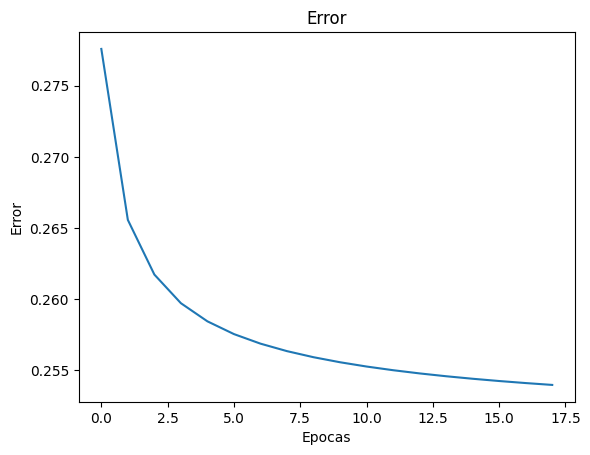

In [19]:
# Visualizar error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epocas')
plt.ylabel('Error')
plt.show()

## Otro ejercicio práctico
Vamos a implementar ahora la backpropagation para el AND problem (la salida será 1 si todas las entradas son verdaderas): 

Epoch: 9999, Average error: 0.02221
Epoch: 19999, Average error: 0.01400
Epoch: 29999, Average error: 0.01092
Epoch: 39999, Average error: 0.00921
Epoch: 49999, Average error: 0.00810
Epoch: 59999, Average error: 0.00730
Epoch: 69999, Average error: 0.00669
Epoch: 79999, Average error: 0.00621
Epoch: 89999, Average error: 0.00581
Epoch: 99999, Average error: 0.00548
Epoch: 109999, Average error: 0.00520
Epoch: 119999, Average error: 0.00496
Epoch: 129999, Average error: 0.00474
Epoch: 139999, Average error: 0.00456
Epoch: 149999, Average error: 0.00439
Epoch: 159999, Average error: 0.00424
Epoch: 169999, Average error: 0.00410
Epoch: 179999, Average error: 0.00397
Output final después de entrenamiento: [[2.03789641e-04 4.55787153e-03 4.55620068e-03 9.93422698e-01]]
Respuesta esperada [0 0 0 1]
Error después de entrenamiento: [[-0.00020379 -0.00455789 -0.00455621  0.00657732]]
Error medio: 0.00397


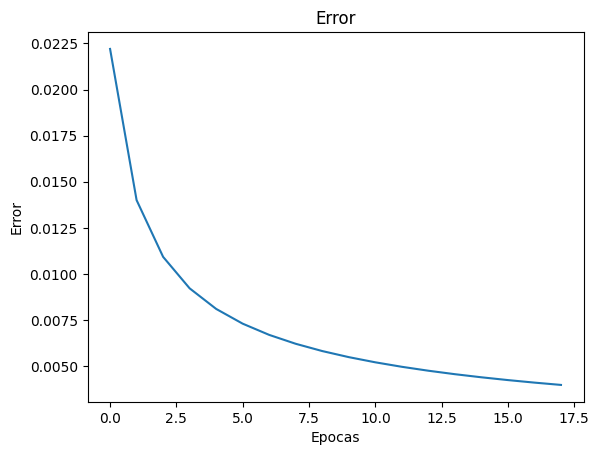

In [20]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # matriz 2x4, donde cada columna es un ejemplo de entrenamiento
d = np.array([0, 0, 0, 1])  # output esperado

# Obtener los parámetros iniciales
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Entrenar la red usando backpropagation
error_list = []
for epoch in range(epochs):
    # Propagación hacia delante
    z1 = np.dot(w1, X) + b1  # Suma ponderada para el hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Activación (función sigmoidea) para hidden layer

    z2 = np.dot(w2, a1) + b2  # Suma ponderada del ouput layer
    a2 = 1 / (1 + np.exp(-z2))  # Activación sigmoide del ouput layer

    # Cálculo de error y backpropagation
    error = d - a2  # Diferencia entre el esperado y el predicho
    da2 = error * (a2 * (1 - a2))  # Derivada del output layer
    dz2 = da2  # Gradiente para el output layer

    # Propagar el error al hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradiente para hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivada para hidden layer

    # Actualizar pesos y bias
    w2 += lr * np.dot(dz2, a1.T)  # Actualizar pesos del hidden al output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Actualizar bias para el output layer

    w1 += lr * np.dot(dz1, X.T)  # Actualizar pesos del input al hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Actualizar bias del hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))
    
    # Testear la red entrenada
z1 = np.dot(w1, X) + b1  # Suma ponderada para los hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Activación para hidden layer

z2 = np.dot(w2, a1) + b2  # Suma ponderada para output layer
a2 = 1 / (1 + np.exp(-z2))  # Activación (sigmoidea) para output layer

# Mostrar resultados
print('Output final después de entrenamiento:', a2)
print('Respuesta esperada', d)
print('Error después de entrenamiento:', error)
print('Error medio: %0.05f'%np.average(abs(error)))

# Visualizar error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epocas')
plt.ylabel('Error')
plt.show()

### Otro ejercicio práctico



Ahora vamos a probar a reducir la tasa de aprendizaje a 0.01 y el número de epocas a 1000000 para el primer problema, y luego comprobar el error: 

Epoch: 9999, Average error: 0.24934
Epoch: 19999, Average error: 0.03823
Epoch: 29999, Average error: 0.02628
Epoch: 39999, Average error: 0.02116
Epoch: 49999, Average error: 0.01816
Epoch: 59999, Average error: 0.01614
Epoch: 69999, Average error: 0.01466
Epoch: 79999, Average error: 0.01352
Epoch: 89999, Average error: 0.01260
Epoch: 99999, Average error: 0.01185
Epoch: 109999, Average error: 0.01122
Epoch: 119999, Average error: 0.01067
Epoch: 129999, Average error: 0.01020
Epoch: 139999, Average error: 0.00979
Epoch: 149999, Average error: 0.00942
Epoch: 159999, Average error: 0.00909
Epoch: 169999, Average error: 0.00879
Epoch: 179999, Average error: 0.00852
Output final después de entrenamiento: [[0.00852034 0.99021928 0.99189638 0.00766106]]
Respuesta esperada [0 1 1 0]
Error después de entrenamiento: [[-0.00852037  0.00978075  0.00810364 -0.00766108]]
Error medio: 0.00852


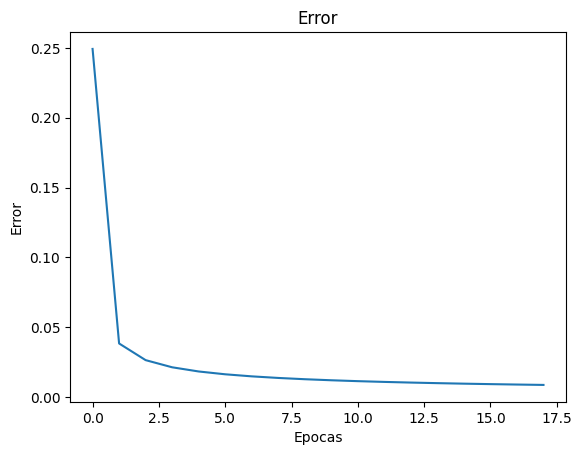

In [21]:
lr = 0.01         # Tasa de aprendizaje
epochs = 1000000   # Número de epocas

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # matriz 2x4, donde cada columna es un ejemplo de entrenamiento
d = np.array([0, 1, 1, 0])  # output esperado

# Obtener los parámetros iniciales
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Entrenar la red usando backpropagation
error_list = []
for epoch in range(epochs):
    # Propagación hacia delante
    z1 = np.dot(w1, X) + b1  # Suma ponderada para el hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Activación (función sigmoidea) para hidden layer

    z2 = np.dot(w2, a1) + b2  # Suma ponderada del ouput layer
    a2 = 1 / (1 + np.exp(-z2))  # Activación sigmoide del ouput layer

    # Cálculo de error y backpropagation
    error = d - a2  # Diferencia entre el esperado y el predicho
    da2 = error * (a2 * (1 - a2))  # Derivada del output layer
    dz2 = da2  # Gradiente para el output layer

    # Propagar el error al hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradiente para hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivada para hidden layer

    # Actualizar pesos y bias
    w2 += lr * np.dot(dz2, a1.T)  # Actualizar pesos del hidden al output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Actualizar bias para el output layer

    w1 += lr * np.dot(dz1, X.T)  # Actualizar pesos del input al hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Actualizar bias del hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))
    
    # Testear la red entrenada
z1 = np.dot(w1, X) + b1  # Suma ponderada para los hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Activación para hidden layer

z2 = np.dot(w2, a1) + b2  # Suma ponderada para output layer
a2 = 1 / (1 + np.exp(-z2))  # Activación (sigmoidea) para output layer

# Mostrar resultados
print('Output final después de entrenamiento:', a2)
print('Respuesta esperada', d)
print('Error después de entrenamiento:', error)
print('Error medio: %0.05f'%np.average(abs(error)))

# Visualizar error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epocas')
plt.ylabel('Error')
plt.show()

## Análisis de resultados

Estos dos conjuntos de resultados son un ejemplo perfecto de cómo el Learning Rate (tasa de aprendizaje) puede determinar si una red neuronal "aprende" o si se queda "atascada".

A primera vista, parece contradictorio: el primer modelo usa un Learning Rate 10 veces más alto y más épocas, pero el segundo es infinitamente mejor. Vamos a analizar por qué.

1. El Primer Caso
Configuración: LR = 0.1 | Épocas = 180,000

Análisis del Error: Empieza en 0.277 y termina en 0.253.

Interpretación: Tras 180,000 iteraciones, el error casi no se ha movido. En el contexto de un problema como el XOR o AND, un error de 0.25 es un indicador típico de que la red no está prediciendo nada; básicamente está devolviendo 0.5 para todo.

¿Qué pasó?: Probablemente el Learning Rate de 0.1 es demasiado alto para esta arquitectura específica. La red está "rebotando" alrededor de un mínimo local o en una zona plana de la función de coste y no logra descender hacia la solución.

2. El Segundo Caso
Configuración: LR = 0.01 | Épocas = 1,000,000 

Análisis del Error: * En la época 9,999 el error es 0.24 (similar al anterior).

En la época 19,999 el error cae drásticamente a 0.038.

Termina en la 179,999 con un error de 0.008.

Interpretación: Este modelo ha convergido. Un error de 0.008 significa que la red está acertando casi al 100% el ground truth.

¿Qué pasó?: Al usar un Learning Rate más pequeño (0.01), permitiendo que la red diera pasos más cortos y precisos. Alrededor de la época 15,000, la red encontró el "camino" correcto hacia el mínimo global y el error se desplomó.